## Домашняя работа №13

Будем работать с датасетом о рыбах https://www.kaggle.com/crowww/a-large-scale-fish-dataset

## Easy
В этой задаче возьмем любые два вида рыб и решим задачу бинарной классификации.

Нужно прочитать данные, разбить на треин и тест, построить модель полносвязной нейросети, проверить качество.

In [1]:
import numpy as np 
import pandas as pd
import os
from pathlib import Path
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import splitfolders # pip install split-folders

In [3]:
#splitfolders.ratio("D:\Курсы Питон\Fish_two_species", output="D:\Курсы Питон",
    #seed=42, ratio=(.7, .1, .2), group_prefix=None, move=False) #train, val, test

In [4]:
train_ds = image_dataset_from_directory(
    directory='D:\Курсы Питон\Fish_train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(148, 197))
validation_ds = image_dataset_from_directory(
    directory='D:\Курсы Питон\Fish_val',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(148, 197))
test_ds = image_dataset_from_directory(
    directory='D:\Курсы Питон\Fish_test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(148, 197))

Found 1400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


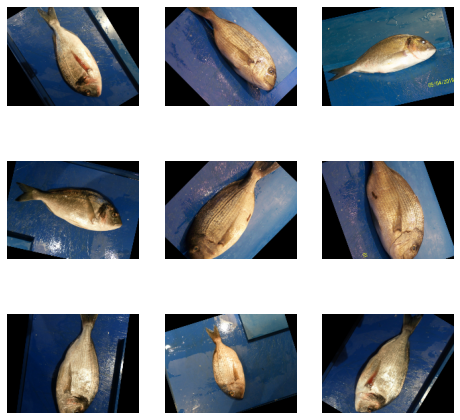

In [5]:
plt.figure(figsize=(8, 8))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

In [6]:
from tensorflow.keras.optimizers import Adam

fc_model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(148, 197, 3)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(2,activation="softmax")
])

fc_model.compile(optimizer=Adam(clipnorm=1),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [7]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fit = fc_model.fit(train_ds,
                validation_data = validation_ds,
                epochs = 10, callbacks=Callback)

Epoch 1/10
44/44 [==============================] - 32s 586ms/step - loss: 4.8861 - accuracy: 0.6643 - val_loss: 0.5302 - val_accuracy: 0.8550
Epoch 2/10
44/44 [==============================] - 4s 93ms/step - loss: 0.4538 - accuracy: 0.8714 - val_loss: 0.1590 - val_accuracy: 0.9400
Epoch 3/10
44/44 [==============================] - 4s 94ms/step - loss: 0.2477 - accuracy: 0.9000 - val_loss: 0.2331 - val_accuracy: 0.8150
Epoch 4/10
44/44 [==============================] - 4s 94ms/step - loss: 0.3904 - accuracy: 0.8486 - val_loss: 0.0652 - val_accuracy: 0.9850
Epoch 5/10
44/44 [==============================] - 4s 95ms/step - loss: 0.2027 - accuracy: 0.9221 - val_loss: 0.0688 - val_accuracy: 0.9750
Epoch 6/10
44/44 [==============================] - 4s 94ms/step - loss: 0.1341 - accuracy: 0.9171 - val_loss: 0.0079 - val_accuracy: 0.9950
Epoch 7/10
44/44 [==============================] - 4s 94ms/step - loss: 0.1388 - accuracy: 0.9321 - val_loss: 0.0196 - val_accuracy: 0.9950
Epoch 8/10


In [8]:
print('Model summary :')
print()
fc_model.summary()

Model summary :

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 148, 197, 3)       0         
                                                                 
 flatten (Flatten)           (None, 87468)             0         
                                                                 
 dense (Dense)               (None, 256)               22392064  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2) 

In [9]:
fc_model.evaluate(test_ds)

13/13 [==============================] - 2s 115ms/step - loss: 0.0423 - accuracy: 0.9850


[0.04230893775820732, 0.9850000143051147]

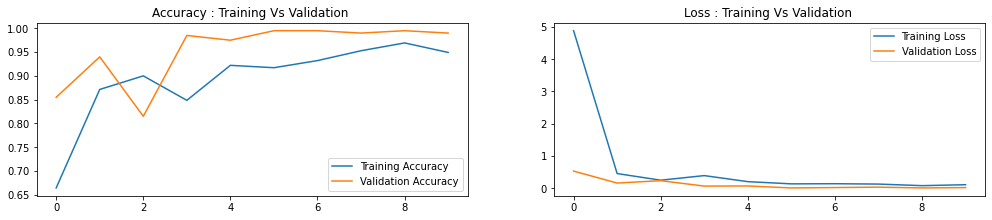

In [10]:
import matplotlib.pyplot as plt

accuracy = mo_fit.history['accuracy']
loss = mo_fit.history['loss']
validation_loss = mo_fit.history['val_loss']
validation_accuracy = mo_fit.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(10), accuracy, label='Training Accuracy')
plt.plot(range(10), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

## Normal
Берем данные о всех рыбах и решаем ту же задачу.

In [11]:
train_ds_a = image_dataset_from_directory(
    directory='D:\Курсы Питон\Fish_train_all',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(148, 197))
validation_ds_a = image_dataset_from_directory(
    directory='D:\Курсы Питон\Fish_val_all',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(148, 197))
test_ds_a = image_dataset_from_directory(
    directory='D:\Курсы Питон\Fish_test_all',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(148, 197))

Found 6300 files belonging to 9 classes.
Found 900 files belonging to 9 classes.
Found 1800 files belonging to 9 classes.


In [12]:
fca_model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(148, 197, 3)),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.05),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.05),
  tf.keras.layers.Dense(9,activation="softmax")
])

fca_model.compile(optimizer=Adam(clipnorm=1),
             loss="categorical_crossentropy",
             metrics=["categorical_accuracy"])

In [13]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=3)
moa_fit = fca_model.fit(train_ds_a,
                validation_data = validation_ds_a,
                batch_size=32,
                epochs = 20, callbacks=Callback)

Epoch 1/20
197/197 [==============================] - 19s 96ms/step - loss: 4.2473 - categorical_accuracy: 0.3857 - val_loss: 1.3704 - val_categorical_accuracy: 0.5189
Epoch 2/20
197/197 [==============================] - 19s 95ms/step - loss: 1.1599 - categorical_accuracy: 0.6079 - val_loss: 0.9721 - val_categorical_accuracy: 0.6400
Epoch 3/20
197/197 [==============================] - 19s 96ms/step - loss: 0.7759 - categorical_accuracy: 0.7295 - val_loss: 0.8084 - val_categorical_accuracy: 0.7289
Epoch 4/20
197/197 [==============================] - 19s 96ms/step - loss: 0.6457 - categorical_accuracy: 0.7781 - val_loss: 0.8878 - val_categorical_accuracy: 0.6967
Epoch 5/20
197/197 [==============================] - 20s 99ms/step - loss: 0.5554 - categorical_accuracy: 0.8063 - val_loss: 0.6351 - val_categorical_accuracy: 0.7800
Epoch 6/20
197/197 [==============================] - 20s 100ms/step - loss: 0.4783 - categorical_accuracy: 0.8354 - val_loss: 0.4756 - val_categorical_accuracy

In [14]:
fca_model.evaluate(test_ds_a)

57/57 [==============================] - 2s 24ms/step - loss: 0.6814 - categorical_accuracy: 0.8550


[0.6814473867416382, 0.8550000190734863]

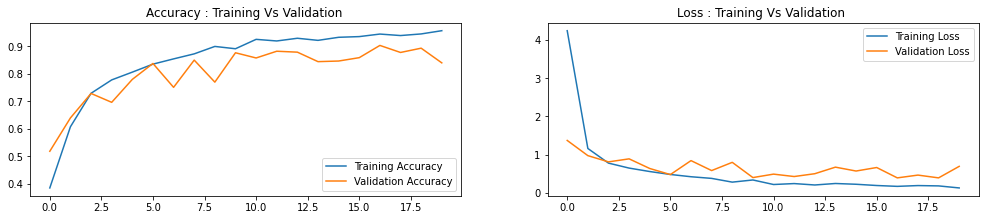

In [16]:
accuracy = moa_fit.history['categorical_accuracy']
loss = moa_fit.history['loss']
validation_loss = moa_fit.history['val_loss']
validation_accuracy = moa_fit.history['val_categorical_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(20), accuracy, label='Training Accuracy')
plt.plot(range(20), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

## Hard
Добавим к модели из Normal аугментацию данных.

Аугментация данных - это прием, при помощи которого мы можем искусственно увеличить количество данных, которые у нас имеются. Например, если речь идет о картинках, то мы можем проводить разные трансформации (поворачивать, разворачивать, сжимать, менять освещение) над картинками и использовать эти данные для обучения.

В keras это делается при помощи DataImageGenerator. Прочитать подробнее можно тут.

In [2]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse

In [3]:
fcag_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(148, 197, 3)),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.05),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.05),
  tf.keras.layers.Dense(9,activation="softmax")
])

fcag_model.compile(optimizer=Adam(clipnorm=1),
             loss="categorical_crossentropy",
             metrics=["categorical_accuracy"])

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.1,
        zoom_range=0.1,
        brightness_range=(0.4, 0.6))

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_train_all',
        target_size=(148, 197),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_val_all',
        target_size=(148, 197),
        batch_size=32,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        'D:\Курсы Питон\Fish_test_all',
        target_size=(148, 197),
        batch_size=32,
        class_mode='categorical')

Found 6300 images belonging to 9 classes.
Found 900 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.


In [5]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=3)
moag_fit = fcag_model.fit(
        train_generator,
        validation_data = validation_generator,
        batch_size=32,
        epochs = 10,
        callbacks=Callback)

Epoch 1/10
197/197 [==============================] - 71s 356ms/step - loss: 3.2604 - categorical_accuracy: 0.2684 - val_loss: 3.0494 - val_categorical_accuracy: 0.3611
Epoch 2/10
197/197 [==============================] - 70s 357ms/step - loss: 1.8112 - categorical_accuracy: 0.3675 - val_loss: 1.6376 - val_categorical_accuracy: 0.4611
Epoch 3/10
197/197 [==============================] - 71s 362ms/step - loss: 1.6171 - categorical_accuracy: 0.4094 - val_loss: 1.6301 - val_categorical_accuracy: 0.4989
Epoch 4/10
197/197 [==============================] - 70s 356ms/step - loss: 1.5265 - categorical_accuracy: 0.4438 - val_loss: 1.4227 - val_categorical_accuracy: 0.5300
Epoch 5/10
197/197 [==============================] - 70s 355ms/step - loss: 1.4419 - categorical_accuracy: 0.4743 - val_loss: 1.4602 - val_categorical_accuracy: 0.5656
Epoch 6/10
197/197 [==============================] - 71s 360ms/step - loss: 1.3382 - categorical_accuracy: 0.5154 - val_loss: 1.5265 - val_categorical_acc

In [6]:
fcag_model.evaluate(test_generator)

57/57 [==============================] - 11s 186ms/step - loss: 1.2545 - categorical_accuracy: 0.6372


[1.2545225620269775, 0.6372222304344177]

57/57 [==============================] - 10s 177ms/step
Classification Report:
----------------------
                     precision    recall  f1-score   support

   Black Sea Sprat       0.12      0.16      0.14       200
   Gilt-Head Bream       0.09      0.07      0.07       200
   Hourse Mackerel       0.07      0.10      0.08       200
        Red Mullet       0.11      0.15      0.13       200
     Red Sea Bream       0.10      0.09      0.09       200
          Sea Bass       0.10      0.12      0.11       200
            Shrimp       0.12      0.08      0.10       200
Striped Red Mullet       0.12      0.07      0.08       200
             Trout       0.09      0.07      0.08       200

          accuracy                           0.10      1800
         macro avg       0.10      0.10      0.10      1800
      weighted avg       0.10      0.10      0.10      1800



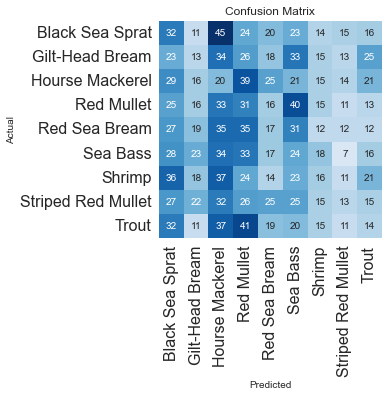

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')
def cm_cr(test_generator, fcag_model):
    preds=fcag_model.predict(test_generator)    
    labels=test_generator.labels
    classes=list(test_generator.class_indices.keys()) # ordered lst of class names 
    pred_list=[] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_generator, fcag_model)

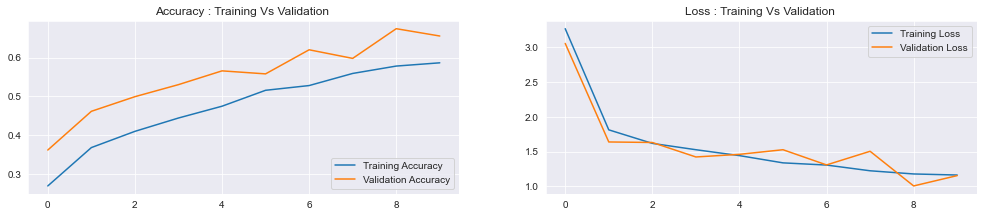

In [8]:
accuracy = moag_fit.history['categorical_accuracy']
loss = moag_fit.history['loss']
validation_loss = moag_fit.history['val_loss']
validation_accuracy = moag_fit.history['val_categorical_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(10), accuracy, label='Training Accuracy')
plt.plot(range(10), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()